# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [118]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + '&appid=' + weather_api_key + '&units=metric'

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | arkhangel'sk
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | tianpeng
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | holualoa
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | champerico
Processing Record 13 of Set 1 | baiti
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | calderitas
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | yelizovo
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | pakxan
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | shakawe
Processing Record 39 of Set 4 | afaahiti
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | prairie view
Processing Record 42 of Set 4 | ulan bator
Processing Record 43 of Set 4 | colonia menno
Processing Record 44 of Set 4 | kulia village
City not found. Skipping...
Processing Record 45 of Set 4 | floro
Processing Record 46 of Set 4 | yuzhno-kurilsk
Processing Record 47 of Set 4 | margate
Processing Record 48 of Set 4 | hawaiian paradise park
Processing Record 49 of Set 4 | kapa'a
Processing Record 0 of Set 5 | isle of lewis
City not found. Skipping...
Processing Record 1 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 2 of Set 5 | la rinconada
Processing Record 3 of Set 5 | linyi
Processing Record 4 of Set 5 | viqueque
Processing Record 5 of Set 5 | prado
Processing Record 6 of Set 5 | ouellah
City not found. Skipping...
Processing Record 7 of Set 5 | saint-mandrier-sur-mer
Processing Record 8 of Set 

Processing Record 27 of Set 8 | amursk
Processing Record 28 of Set 8 | puerto baquerizo moreno
Processing Record 29 of Set 8 | montivilliers
Processing Record 30 of Set 8 | calca
Processing Record 31 of Set 8 | penzance
Processing Record 32 of Set 8 | vallenar
Processing Record 33 of Set 8 | hetauda
Processing Record 34 of Set 8 | drayton valley
Processing Record 35 of Set 8 | benjamin constant
Processing Record 36 of Set 8 | zyryanskoye
Processing Record 37 of Set 8 | deqen
Processing Record 38 of Set 8 | dhuusamarreeb
Processing Record 39 of Set 8 | puerto armuelles
Processing Record 40 of Set 8 | banamba
Processing Record 41 of Set 8 | karabash
Processing Record 42 of Set 8 | egilsstadir
Processing Record 43 of Set 8 | san luis ixcan
Processing Record 44 of Set 8 | mikuni
Processing Record 45 of Set 8 | kralendijk
Processing Record 46 of Set 8 | al hazm
Processing Record 47 of Set 8 | ust-tsilma
Processing Record 48 of Set 8 | lubango
Processing Record 49 of Set 8 | la'ie
Processing

Processing Record 19 of Set 12 | cedeira
Processing Record 20 of Set 12 | novyy urengoy
Processing Record 21 of Set 12 | xianning
Processing Record 22 of Set 12 | khandyga
Processing Record 23 of Set 12 | fang
Processing Record 24 of Set 12 | kokstad
Processing Record 25 of Set 12 | ponta delgada
Processing Record 26 of Set 12 | mikumi
Processing Record 27 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 28 of Set 12 | bikenibeu village
Processing Record 29 of Set 12 | chernyshevskiy
Processing Record 30 of Set 12 | ilhabela
Processing Record 31 of Set 12 | big spring
Processing Record 32 of Set 12 | yokadouma
Processing Record 33 of Set 12 | raja
Processing Record 34 of Set 12 | tamanrasset
Processing Record 35 of Set 12 | midvagur
Processing Record 36 of Set 12 | padangsidempuan
Processing Record 37 of Set 12 | petawawa
Processing Record 38 of Set 12 | mount pleasant
Processing Record 39 of Set 12 | aykhal
Processing Record 40 of Set 12 | seneca falls
Proce

In [119]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          613
Lat           613
Lng           613
Max Temp      613
Humidity      613
Cloudiness    613
Wind Speed    613
Country       613
Date          613
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,83,100,2.24,NZ,1683385425
1,arkhangel'sk,64.5401,40.5433,1.71,59,100,3.50,RU,1683385275
2,wailua homesteads,22.0669,-159.3780,22.44,81,100,7.20,US,1683385426
3,puerto ayora,-0.7393,-90.3518,29.98,92,58,3.13,EC,1683385113
4,tianpeng,30.9866,103.9393,21.26,73,100,3.12,CN,1683385427


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,83,100,2.24,NZ,1683385425
1,arkhangel'sk,64.5401,40.5433,1.71,59,100,3.50,RU,1683385275
2,wailua homesteads,22.0669,-159.3780,22.44,81,100,7.20,US,1683385426
3,puerto ayora,-0.7393,-90.3518,29.98,92,58,3.13,EC,1683385113
4,tianpeng,30.9866,103.9393,21.26,73,100,3.12,CN,1683385427


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

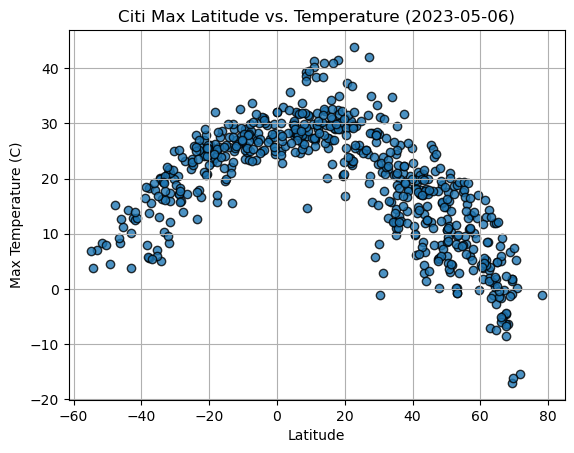

In [121]:
# Build scatter plot for latitude vs. temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8, label="Cities")
plt.grid(True)


# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Citi Max Latitude vs. Temperature (2023-05-06)')


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

# check the date only

#### Latitude Vs. Humidity

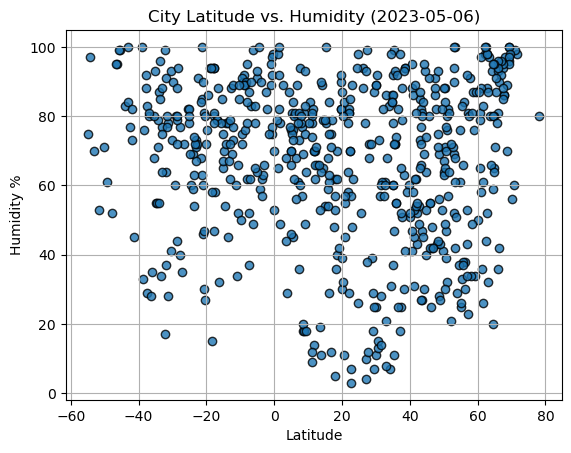

In [123]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8, label="Cities")
plt.grid(True)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2023-05-06)')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

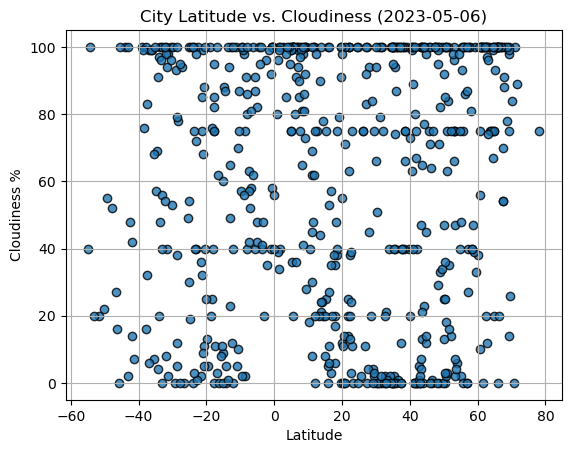

In [124]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8, label="Cities")
plt.grid(True)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2023-05-06)')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

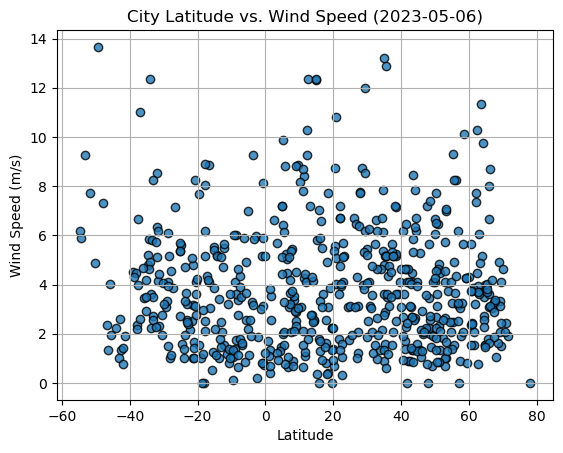

In [125]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8, label="Cities")
plt.grid(True)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-05-06)')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [126]:
# Define a function to create Linear Regression plots

def plotlnreg(x_values, y_values, title, text_coords): 
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [127]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,arkhangel'sk,64.5401,40.5433,1.71,59,100,3.50,RU,1683385275
2,wailua homesteads,22.0669,-159.3780,22.44,81,100,7.20,US,1683385426
4,tianpeng,30.9866,103.9393,21.26,73,100,3.12,CN,1683385427
6,holualoa,19.6228,-155.9522,20.43,82,91,2.24,US,1683385428
7,kayangel,8.0823,134.7173,28.06,77,81,0.90,PW,1683385429


In [128]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,83,100,2.24,NZ,1683385425
3,puerto ayora,-0.7393,-90.3518,29.98,92,58,3.13,EC,1683385113
5,port elizabeth,-33.9180,25.5701,20.16,87,20,12.35,ZA,1683385268
8,grytviken,-54.2811,-36.5092,3.80,97,100,5.90,GS,1683385429
9,invercargill,-46.4000,168.3500,8.34,95,16,1.34,NZ,1683385406


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7002200530483835


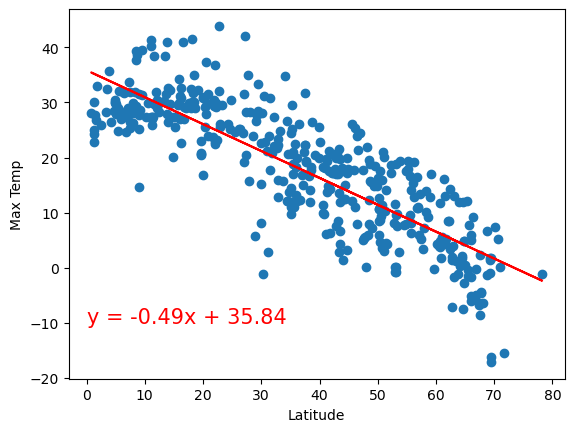

In [129]:
# Linear regression on Northern Hemisphere 
y_values = northern_hemi_df['Max Temp']
x_values = northern_hemi_df['Lat']

# n_temp_lat_lin_reg = linregress(lin_reg_x, lin_reg_y)

# n_temp_lat_lin_reg

# # Plot
# slope = n_temp_lat_lin_reg[0]
# intercept = n_temp_lat_lin_reg[1]

# # create a scatter plot of x vs. y
# plt.scatter(lin_reg_x, lin_reg_y)

# # generate the line for the linear regression model
# line_x = [min(lin_reg_x), max(lin_reg_x)]
# line_y = [slope * xi + intercept for xi in line_x]

# # plot the line on top of the scatter plot
# plt.plot(line_x, line_y, color='red')
# line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'

# # add labels and title to the plot
# plt.ylabel('Max Temp')
# plt.xlabel('Latitude')
# plt.title(f'The r-value is: {n_temp_lat_lin_reg[2]}')
# plt.annotate(line_eq,(0, -10), color='r',fontsize=15)

# # display the plot
plotlnreg(x_values, y_values, 'Max Temp', (0,-10))



The r-squared is: 0.6857328179124456


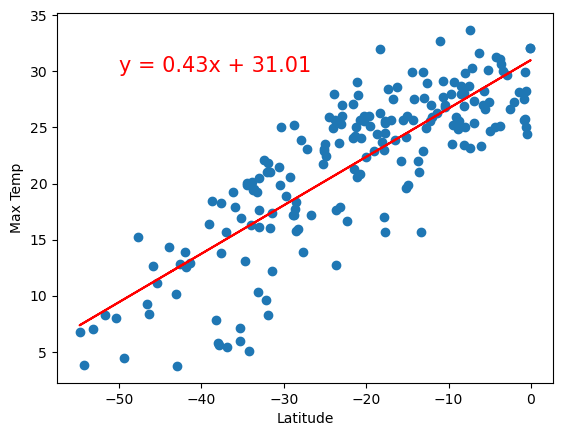

In [137]:
# Linear regression on Southern Hemisphere

y_values = southern_hemi_df['Max Temp']
x_values = southern_hemi_df['Lat']


plotlnreg(x_values, y_values, 'Max Temp', (-50,30))


**Discussion about the linear relationship:**

The main difference between the two code blocks is the input data. In the first block, the data is from the Northern Hemisphere, and in the second block, the data is from the Southern Hemisphere. The latitude range for the regression line is also different, with (0,-10) for the Northern Hemisphere and (-50,30) for the Southern Hemisphere. This is likely because the temperature distribution and patterns of change may be different in the two hemispheres, so the regression lines need to be calculated and plotted separately to accurately reflect the underlying relationships between temperature and latitude in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.016652840933909206


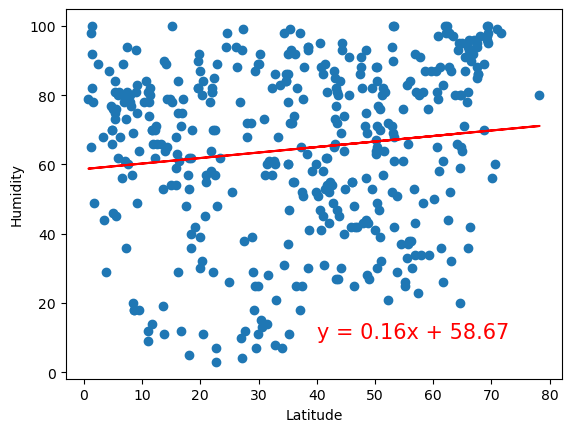

In [144]:
# Northern Hemisphere

y_values = northern_hemi_df['Humidity']
x_values = northern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Humidity', (40,10))

The r-squared is: 0.004180312474675471


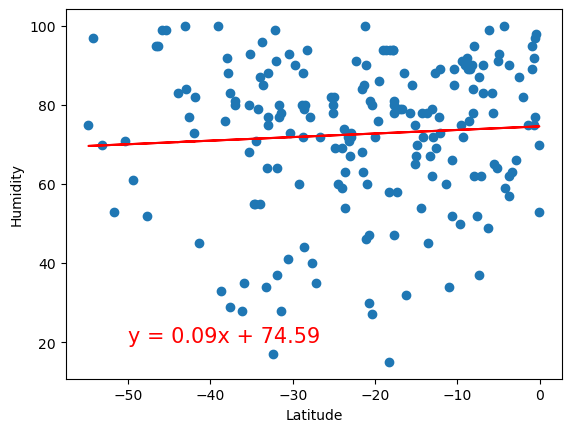

In [150]:
# Southern Hemisphere

y_values = southern_hemi_df['Humidity']
x_values = southern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Humidity', (-50,20))


**Discussion about the linear relationship:** 

Both code blocks are performing linear regression analysis between Humidity and Latitude in the Northern Hemisphere and Southern Hemisphere, respectively. The main difference is in the data being used.

The first code block is using data from the Northern Hemisphere, specifically using the 'Humidity' and 'Lat' columns from the 'northern_hemi_df' DataFrame. The resulting regression line is then plotted using the 'plotlnreg' function with the title 'Humidity' and the coordinates (40,10) as the location of the title on the plot.

The second code block is using data from the Southern Hemisphere, specifically using the 'Humidity' and 'Lat' columns from the 'southern_hemi_df' DataFrame. The resulting regression line is then plotted using the 'plotlnreg' function with the title 'Humidity' and the coordinates (-50,20) as the location of the title on the plot.

Overall, the code blocks are quite similar in their structure and purpose, but differ in the output, in the northern hemisphere we come across that r-squared is: 0.016652840933909206 and in the southern hemisphere we have The r-squared is: 0.004180312474675471 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0025430690328064128


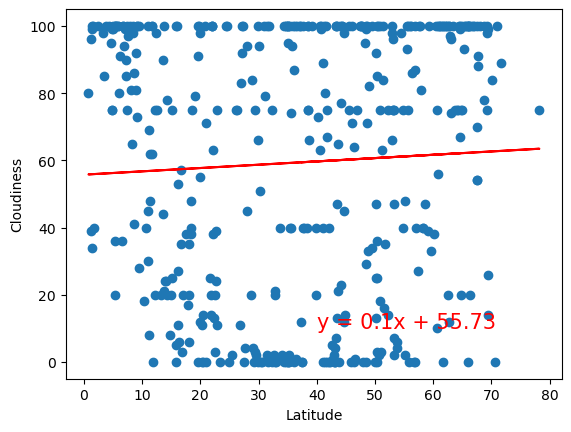

In [151]:
# Northern Hemisphere

y_values = northern_hemi_df['Cloudiness']
x_values = northern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.008565488790683033


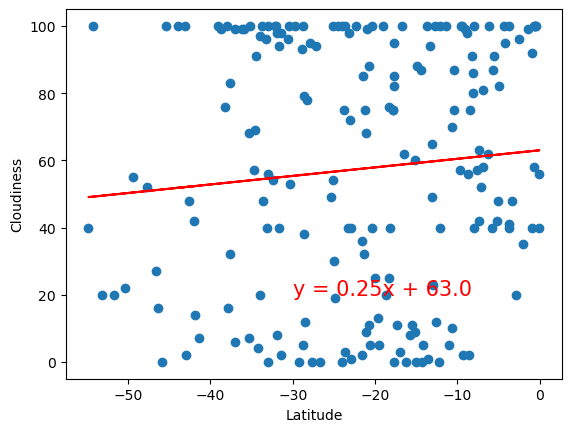

In [153]:
# Southern Hemisphere

y_values = southern_hemi_df['Cloudiness']
x_values = southern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Cloudiness', (-30,20))


**Discussion about the linear relationship:** 

This two code snippets are performing the same task of creating a linear regression plot for the relationship between cloudiness and latitude, but for different hemispheres.

The main difference between the two is the data we are using, as one is for the Northern Hemisphere and the other for the Southern Hemisphere. Additionally, the latitude ranges for the plots are also different, with the Northern Hemisphere plot having a range of (40, 10) hence we have the r-squared of: 0.0025430690328064128 , and the Southern Hemisphere plot having a range of (-30, 20) having as a result of r-squared is: 0.008565488790683033.




### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0032711190013047244


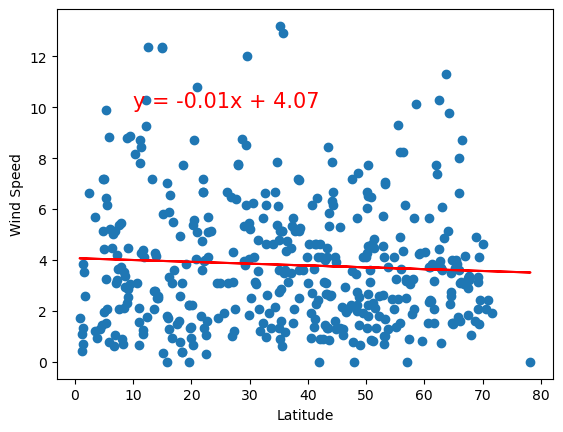

In [157]:
# Northern Hemisphere

y_values = northern_hemi_df['Wind Speed']
x_values = northern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Wind Speed', (10,10))


The r-squared is: 0.051102199069081894


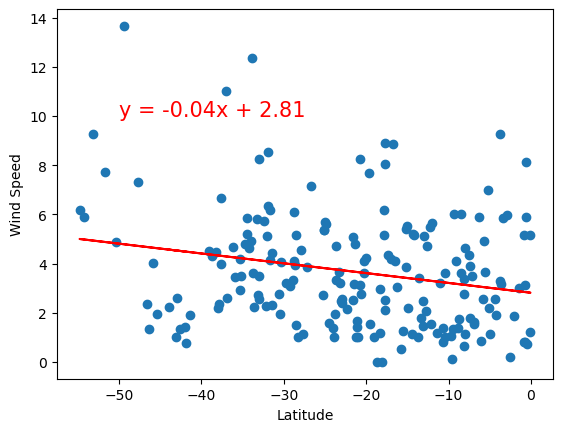

In [159]:
# Southern Hemisphere

y_values = southern_hemi_df['Wind Speed']
x_values = southern_hemi_df['Lat']

# display the plot

plotlnreg(x_values, y_values, 'Wind Speed', (-50,10))


**Discussion about the linear relationship:** 

The difference between the two code snippets is the R-squared value which measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R-squared value for the Northern Hemisphere is 0.0032, which is a weak relationship, while the R-squared value for the Southern Hemisphere is 0.0511, which is a slightly stronger relationship.

Overall, both code snippets provide a linear regression analysis between wind speed and latitude for the respective hemispheres and plot the results using the plotlnreg() function. The second plot is drawn in the bottom left corner of the plot and shows a slightly stronger relationship between the variables compared to the first plot.